## Carga Inicial y Exploración de datos

In [1]:
import h5py

# Nombre del archivo
filename = "OMI-Aura_L3-OMDOAO3e_2005m0101_v003-2011m1109t085643.he5"

# Visualizamos la data
with h5py.File(filename, "r") as file: 
    def visitor(name, obj):
        print(name)
    file.visititems(visitor)

HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/GRIDS
HDFEOS/GRIDS/ColumnAmountO3
HDFEOS/GRIDS/ColumnAmountO3/Data Fields
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/CloudFraction
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/CloudFractionPrecision
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/CloudPressure
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/CloudPressurePrecision
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3Precision
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/EffectiveTemperature
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/EffectiveTemperaturePrecision
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/GhostColumnAmountO3
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/SolarZenithAngle
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/TerrainHeight
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/TerrainReflectivity
HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ViewingZenithAngle
HDFEOS INFORMATION
HDFEOS INFORMATION/StructMetadata.0


In [2]:
# Path del ozono y del cloud fraction
dataset_path_ozone = "HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3"
dataset_path_precision = "HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3Precision"
dataset_path_cf = "HDFEOS/GRIDS/ColumnAmountO3/Data Fields/CloudFraction"
    
# Cargamos la data y la ponemos en variables
with h5py.File(filename, "r") as file:
    ozone_data = file[dataset_path_ozone][:]
    cf_data = file[dataset_path_cf][:]
    def explore(name, obj):
        if isinstance(obj, h5py.Dataset):
            print("Dataset:", name, "-> shape:", obj.shape)
    file["HDFEOS/GRIDS/ColumnAmountO3"].visititems(explore)
    
    meta_str = file["HDFEOS INFORMATION/StructMetadata.0"][()].decode()
    print(meta_str)

Dataset: Data Fields/CloudFraction -> shape: (720, 1440)
Dataset: Data Fields/CloudFractionPrecision -> shape: (720, 1440)
Dataset: Data Fields/CloudPressure -> shape: (720, 1440)
Dataset: Data Fields/CloudPressurePrecision -> shape: (720, 1440)
Dataset: Data Fields/ColumnAmountO3 -> shape: (720, 1440)
Dataset: Data Fields/ColumnAmountO3Precision -> shape: (720, 1440)
Dataset: Data Fields/EffectiveTemperature -> shape: (720, 1440)
Dataset: Data Fields/EffectiveTemperaturePrecision -> shape: (720, 1440)
Dataset: Data Fields/GhostColumnAmountO3 -> shape: (720, 1440)
Dataset: Data Fields/SolarZenithAngle -> shape: (720, 1440)
Dataset: Data Fields/TerrainHeight -> shape: (720, 1440)
Dataset: Data Fields/TerrainReflectivity -> shape: (720, 1440)
Dataset: Data Fields/ViewingZenithAngle -> shape: (720, 1440)
GROUP=SwathStructure
END_GROUP=SwathStructure
GROUP=GridStructure
	GROUP=GRID_1
		GridName="ColumnAmountO3"
		XDim=1440
		YDim=720
		UpperLeftPointMtrs=(-180000000.000000,90000000.000000)

## Visualización data mundial

In [3]:
# Paleta de colores custom
from matplotlib.colors import LinearSegmentedColormap

colors = [
    (0.6, 0.0, 0.0),    # dark red
    (1.0, 0.4, 0.2),    # orange-red
    (1.0, 0.9, 0.5),    # light yellow
    (0.7, 0.9, 0.7),    # pale green
    (0.4, 0.7, 0.9),    # light blue
    (0.2, 0.4, 0.8),    # medium blue
    (0.1, 0.2, 0.4)     # dark blue
]
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
custom_cmap = custom_cmap.reversed()

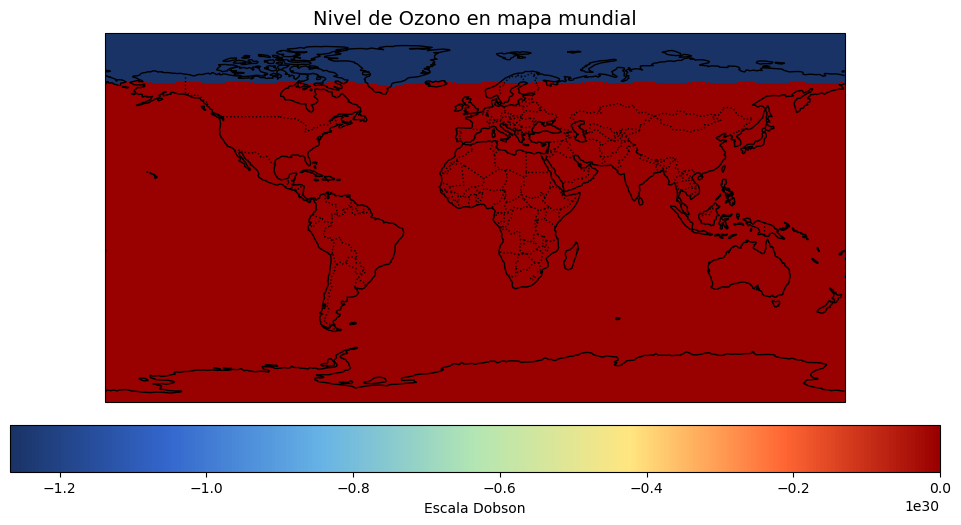

In [4]:
# Importamos algunas librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Nivel de Ozono en mapa mundial", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax.set_global()

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
cb.set_label("Escala Dobson")  # Adjust based on actual units

plt.show()

In [5]:
print('Valor mínimo:', round(ozone_data.min()))
print('Valor máximo:', ozone_data.max())

Valor mínimo: -1267650600228229401496703205376
Valor máximo: 513.5


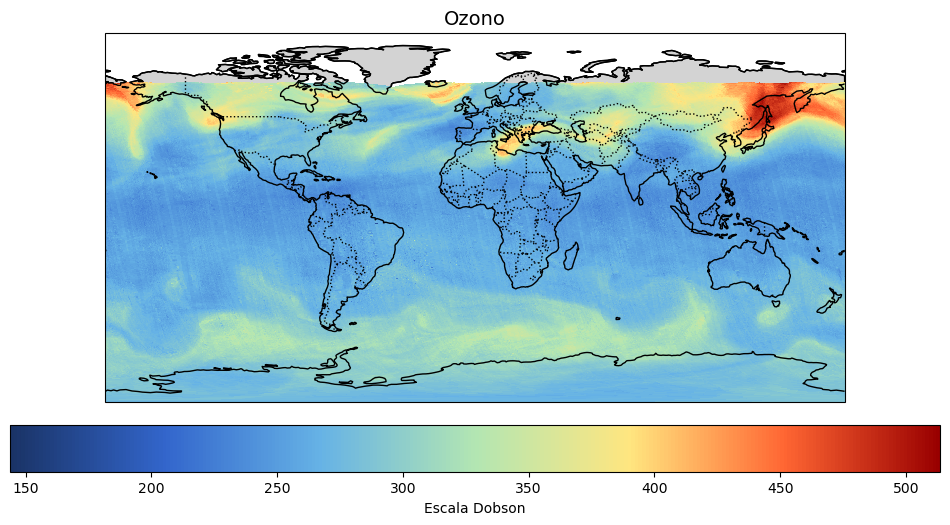

In [6]:
# Rellena valores menores a 0 como si fuera data faltante
ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)

# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Ozono", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax.set_global()

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
cb.set_label("Escala Dobson")

plt.show()

## Visualización en mapa de uruguay

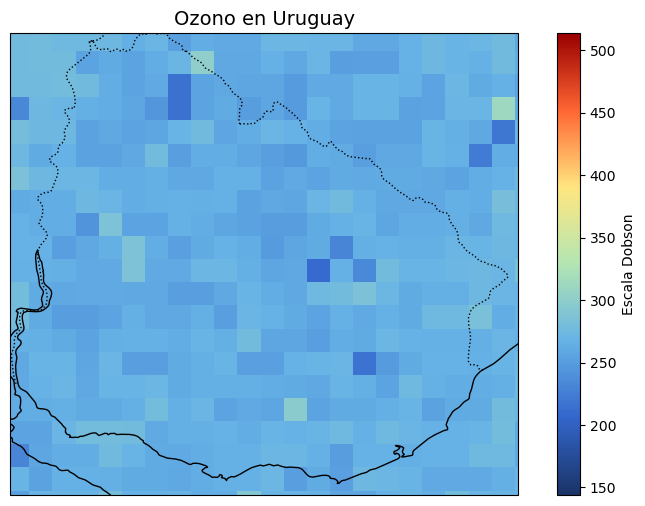

In [7]:
# Rellena valores menores a 0 como si fuera data faltante
ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)

# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Ozono en Uruguay", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

# Zoom into Uruguay
ax.set_extent([-58.5, -53.0, -35.1, -30.1], crs=ccrs.PlateCarree())

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="vertical", pad=0.05)
cb.set_label("Escala Dobson")  # Adjust based on actual units

"""
# Add ozono values as text labels
for i in range(ozone_data.shape[0]):
    for j in range(ozone_data.shape[1]):
        lon, lat = lon_grid[i, j], lat_grid[i, j]
        if -58.5 <= lon <= -53 and -35.1 <= lat <= -30.1:  # Only label inside Uruguay's zoomed-in area
            if not np.isnan(ozone_data[i, j]):  # Avoid NaN values
                ax.text(lon, lat, f"{ozone_data[i, j]:.2f}, {i}, {j}", fontsize=1,
                        ha="center", va="center", color="black",
                        transform=ccrs.PlateCarree())
"""
plt.show()

## Comparación con archivo extraido manualmente

In [8]:
# Cargamos la data y la ponemos en variables
with h5py.File(filename, "r") as file:
    ozone = file["HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3"][:]
    
# Create latitude and longitude grids
lons = np.linspace(-180, 180, ozone.shape[1])  # Longitudes
lats = np.linspace(-90, 90, ozone.shape[0])    # Latitudes

lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

lon_idx = np.where((lons >= lon_min) & (lons <= lon_max))[0]
lat_idx = np.where((lats >= lat_min) & (lats <= lat_max))[0]

ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1]

print(ozone_subset)

[[269.  253.6 265.7 265.7 264.4 261.1 261.1 259.2 262.6 265.6 265.6 272.1
  250.9 261.7 252.4 272.9 271.  268.5 259.6 259.6 259.6 264.4]
 [230.5 256.7 263.1 263.1 275.7 268.3 261.6 259.8 263.4 265.4 266.3 272.1
  272.1 265.5 249.6 267.6 267.6 264.3 267.9 267.9 274.4 274.4]
 [255.  255.  270.3 278.9 278.9 277.8 259.6 264.6 264.6 267.7 262.3 268.9
  266.7 268.5 274.9 265.8 274.6 269.7 266.6 266.6 268.7 278.4]
 [263.3 263.3 264.7 261.1 261.1 263.9 279.2 264.2 269.7 255.4 260.  257.7
  296.3 255.1 261.2 261.2 264.3 268.  254.8 262.1 262.1 277.6]
 [259.5 266.6 269.9 258.9 268.4 268.4 271.4 262.2 264.4 264.4 264.8 262.4
  261.2 258.2 268.9 263.7 255.9 274.2 265.7 262.6 262.6 264.1]
 [259.1 269.  269.  257.7 269.8 250.7 250.7 262.  264.7 268.5 252.8 252.8
  266.7 268.  270.  216.8 249.  261.5 266.9 266.9 265.7 269.2]
 [265.7 263.9 260.9 256.4 264.  266.1 266.1 262.4 268.4 264.2 277.3 257.7
  257.7 251.7 263.  261.6 271.3 266.6 266.  266.  264.5 270.8]
 [279.5 261.5 250.4 250.4 255.7 263.8 259

In [9]:
from netCDF4 import Dataset

nc_data = Dataset('g4.timeAvgMap.OMDOAO3e_003_ColumnAmountO3.20050101-20050101.58W_35S_53W_30S.nc', 'r')
ozone_data_giovanni = nc_data.variables['OMDOAO3e_003_ColumnAmountO3'][:, :]
print(ozone_data_giovanni)

[[269.  253.6 265.7 265.7 264.4 261.1 261.1 259.2 262.6 265.6 265.6 272.1
  250.9 261.7 252.4 272.9 271.  268.5 259.6 259.6 259.6 264.4]
 [230.5 256.7 263.1 263.1 275.7 268.3 261.6 259.8 263.4 265.4 266.3 272.1
  272.1 265.5 249.6 267.6 267.6 264.3 267.9 267.9 274.4 274.4]
 [255.  255.  270.3 278.9 278.9 277.8 259.6 264.6 264.6 267.7 262.3 268.9
  266.7 268.5 274.9 265.8 274.6 269.7 266.6 266.6 268.7 278.4]
 [263.3 263.3 264.7 261.1 261.1 263.9 279.2 264.2 269.7 255.4 260.  257.7
  296.3 255.1 261.2 261.2 264.3 268.  254.8 262.1 262.1 277.6]
 [259.5 266.6 269.9 258.9 268.4 268.4 271.4 262.2 264.4 264.4 264.8 262.4
  261.2 258.2 268.9 263.7 255.9 274.2 265.7 262.6 262.6 264.1]
 [259.1 269.  269.  257.7 269.8 250.7 250.7 262.  264.7 268.5 252.8 252.8
  266.7 268.  270.  216.8 249.  261.5 266.9 266.9 265.7 269.2]
 [265.7 263.9 260.9 256.4 264.  266.1 266.1 262.4 268.4 264.2 277.3 257.7
  257.7 251.7 263.  261.6 271.3 266.6 266.  266.  264.5 270.8]
 [279.5 261.5 250.4 250.4 255.7 263.8 259

In [10]:
# Nice!
ozone_data_giovanni - ozone_subset

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.

## Creando pandas dataframe de los datos

In [11]:
# Referencias obtenidas del archivo particular
print(nc_data.variables['lat'][:])
print(len(nc_data.variables['lat'][:]))
print(nc_data.variables['lon'][:])
print(len(nc_data.variables['lon'][:]))

[-34.875 -34.625 -34.375 -34.125 -33.875 -33.625 -33.375 -33.125 -32.875
 -32.625 -32.375 -32.125 -31.875 -31.625 -31.375 -31.125 -30.875 -30.625
 -30.375 -30.125]
20
[-58.375 -58.125 -57.875 -57.625 -57.375 -57.125 -56.875 -56.625 -56.375
 -56.125 -55.875 -55.625 -55.375 -55.125 -54.875 -54.625 -54.375 -54.125
 -53.875 -53.625 -53.375 -53.125]
22


In [12]:
lon = np.linspace(-180, 180, ozone.shape[1]).round(3)  # Longitudes
lat = np.linspace(-90, 90, ozone.shape[0]).round(3)    # Latitudes

lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

lon_val = lon[(lon >= lon_min) & (lon <= lon_max)] 
lat_val = lat[(lat >= lat_min) & (lat <= lat_max)]

lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]

ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1]

print('Lista completa de valores de latitud y longitud')
print(lat_val)
print(len(lat_val))
print(lon_val)
print(len(lon_val))

Lista completa de valores de latitud y longitud
[-34.924 -34.673 -34.423 -34.172 -33.922 -33.672 -33.421 -33.171 -32.921
 -32.67  -32.42  -32.17  -31.919 -31.669 -31.419 -31.168 -30.918 -30.668
 -30.417 -30.167]
20
[-58.416 -58.165 -57.915 -57.665 -57.415 -57.165 -56.915 -56.664 -56.414
 -56.164 -55.914 -55.664 -55.413 -55.163 -54.913 -54.663 -54.413 -54.163
 -53.912 -53.662 -53.412 -53.162]
22


In [13]:
# No logramos matchear los datos de giovanni pero nuestra data se sigue viendo bien
ozone_data_giovanni - ozone_subset

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.

In [14]:
X = []

for l_lat in lat_idx:
    for l_lon in lon_idx:
        x = []
        x.append(lat[l_lat])
        x.append(lon[l_lon])
        x.append(ozone[l_lat,l_lon])
        X.append(x)
        
X = np.asarray(X)

In [15]:
import pandas as pd

df = pd.DataFrame(X, columns = ['Latitud', 'Longitud', 'Ozono'])

df

,Latitud,Longitud,Ozono
0,-34.924,-58.416,269.000000
1,-34.924,-58.165,253.600006
2,-34.924,-57.915,265.700012
3,-34.924,-57.665,265.700012
4,-34.924,-57.415,264.399994
...,...,...,...
435,-30.167,-54.163,267.000000
436,-30.167,-53.912,272.399994
437,-30.167,-53.662,268.500000
438,-30.167,-53.412,271.000000


In [16]:
filename.split('_')[2].replace('m','')

'20050101'

In [17]:
fecha = filename.split('_')[2].replace('m','')

df['Fecha'] = fecha

df

,Latitud,Longitud,Ozono,Fecha
0,-34.924,-58.416,269.000000,20050101
1,-34.924,-58.165,253.600006,20050101
2,-34.924,-57.915,265.700012,20050101
3,-34.924,-57.665,265.700012,20050101
4,-34.924,-57.415,264.399994,20050101
...,...,...,...,...
435,-30.167,-54.163,267.000000,20050101
436,-30.167,-53.912,272.399994,20050101
437,-30.167,-53.662,268.500000,20050101
438,-30.167,-53.412,271.000000,20050101
